<a href="https://colab.research.google.com/github/LeoSotoG/Regression-Model-for-Estimating-Used-Car-Values/blob/main/Regression_Model_for_Estimating_Used_Car_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyect Information

Datos recopilados de listados de automóviles usados. Los cuales se han separado en archivos correspondientes a cada fabricante de automóviles.

Estos datos recopilados se deben utilizar para hacer una herramienta para predecir cuánto debería vender un antiguo automóvil. Con ayuda de una regresión lineal.

**Proceso:**

Debido a que los dataframes estan separados por marca, intentare agregar una nueva columa llamada **"marca"** que contendra el nombre de la marca del auto y luego concatenare los dataframes.

##Column Information

* **make** (fabricante): Volkswagen
* **year** (año): Año de registro
* **price** (precio): Precio en libras esterlinas (£)
* **transmission** (transmisión): Tipo de caja de
 cambios
* **mileage** (kilometraje): Kilometraje en millas
* **fuelType** (tipo de combustible): Tipo de
 combustible
* **tax** (impuesto): Impuesto en libras esterlinas (£)
* **mpg** (millas por galón): Consumo de combustible  
 en millas por galón
* **engineSize** (tamaño del motor): Tamaño del motor en litros

##Load libraries

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Para el preprocesamiento
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Para modelado
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

##Load Data

In [178]:
# Datos de Audi
df_audi = pd.read_csv("audi.csv")

# Datos BMW
df_bmw = pd.read_csv("bmw.csv")

# Datos Ford
df_ford = pd.read_csv("ford.csv")

# Datos Mercedes
df_merc = pd.read_csv("merc.csv")

# Datos Toyota
df_toyota = pd.read_csv("toyota.csv")

# Datos Volkswagen
df_vw = pd.read_csv("vw.csv")

In [179]:
df_vw

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


**Ahora utilizare una función que verifica si las columnas de varios conjuntos de datos son las mismas.**

In [180]:
def verificar_columnas_iguales(datasets):
    # Obtener las columnas de todos los conjuntos de datos
    columnas = [set(df.columns) for df in datasets]

    # Verificar si todas las columnas son iguales
    return all(columnas[0] == col for col in columnas[1:])

In [181]:
# Si tienes más de dos conjuntos de datos, simplemente agrégalos a la lista
datasets = [df_audi, df_bmw, df_ford, df_merc, df_toyota, df_vw]

if verificar_columnas_iguales(datasets):
    print("Las columnas de los conjuntos de datos son iguales.")
else:
    print("Las columnas de los conjuntos de datos son diferentes.")

Las columnas de los conjuntos de datos son iguales.


**Antes de realizar la concatenación, revisare los datos el resumen estadistico de cada dataset**

In [182]:
df_audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [183]:
df_bmw.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [184]:
df_ford.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [185]:
df_merc.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [186]:
df_toyota.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [187]:
df_vw.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


**Rango de años:**
* Audi:      1997-2020
* BMW:       1996-2020
* Ford:      1996-2060
* Mercedes:  1970-2020
* Toyota:    1998-2020
* Volkwagen: 2000-2020

**Observaciones**
* Se tienen distintos rangos de años
* Todos podrian cumplir con el rango de años 2000-2020
* En los datos de Ford existe un outlier que lleva los años hasta 60 o puede que si lleguen hasta alla.

In [188]:
df_ford["year"].unique()

array([2017, 2018, 2019, 2015, 2014, 2016, 2013, 2020, 2012, 2008, 2010,
       2009, 2011, 1998, 2007, 2005, 2006, 2002, 2003, 1996, 2004, 2000,
       2060])

In [189]:
# Cantidad de filas donde el valor en la columna 'year' es igual a 2060
(df_ford["year"] == 2060).sum()

1

In [190]:
df_ford.drop(df_ford[df_ford["year"] == 2060].index, inplace=True)

In [191]:
df_audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [192]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [193]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17964 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   tax           17964 non-null  int64  
 7   mpg           17964 non-null  float64
 8   engineSize    17964 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


In [194]:
df_merc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [195]:
df_toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [196]:
df_vw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [197]:
e = pd.concat([df_audi, df_bmw, df_ford, df_merc, df_toyota, df_vw], ignore_index=True)

**Agregar columna de marca**

In [198]:
df_audi["marca"] = "audi"
df_bmw["marca"] = "bmw"
df_ford["marca"] = "ford"
df_merc["marca"] = "mercedes"
df_toyota["marca"] = "toyota"
df_vw["marca"] = "volkswagen"

In [199]:
df_ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,marca
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,ford
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,ford
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,ford
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,ford
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,ford


In [200]:
# Reiniciar los índices de los DataFrames antes de la concatenación
df_audi.reset_index(drop=True, inplace=True)
df_bmw.reset_index(drop=True, inplace=True)
df_ford.reset_index(drop=True, inplace=True)
df_merc.reset_index(drop=True, inplace=True)
df_toyota.reset_index(drop=True, inplace=True)
df_vw.reset_index(drop=True, inplace=True)

In [201]:
data = pd.concat([df_audi, df_bmw, df_ford, df_merc, df_toyota, df_vw], ignore_index=True)

In [202]:
data.shape

(74427, 10)

In [203]:
data.sample(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,marca
62897,Golf,2019,23800,Semi-Auto,5016,Petrol,145,43.5,1.5,volkswagen
66399,Polo,2018,12498,Manual,6345,Petrol,150,58.9,1.0,volkswagen
7717,A5,2019,30000,Automatic,4012,Petrol,145,40.4,2.0,audi
57053,Aygo,2017,8000,Manual,30000,Petrol,0,68.9,1.0,toyota
46725,S Class,2019,90759,Semi-Auto,1000,Petrol,145,34.0,4.0,mercedes


In [204]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,74427.000000,74427.000000,74427.000000,74427.000000,74427.000000,74427.000000
mean,2017.074597,18455.329531,23328.130087,118.936139,55.799864,1.741107
std,2.160665,10481.080800,21613.891734,65.642532,17.403236,0.598240
min,1970.000000,495.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10999.000000,7094.500000,125.000000,47.100000,1.300000
50%,2017.000000,16400.000000,17500.000000,145.000000,55.400000,1.800000
75%,2019.000000,22980.000000,32924.500000,145.000000,64.200000,2.000000
max,2020.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


## Data processing

###Split variables

In [205]:
numerical_features = ["year",	"mileage",	"tax",	"mpg",	"engineSize"]

**Deje fuera a "model" porque en el one-hot encoder generaba demasiadas columnas y metia ruido al modelo**

In [206]:
#categorical_features = ["model",	"transmission",	"fuelType",	"marca"]
categorical_features = ["transmission",	"fuelType",	"marca"]

### Nulls

In [207]:
data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
marca           0
dtype: int64

Como se puede observar no existen nulos

###Outliers

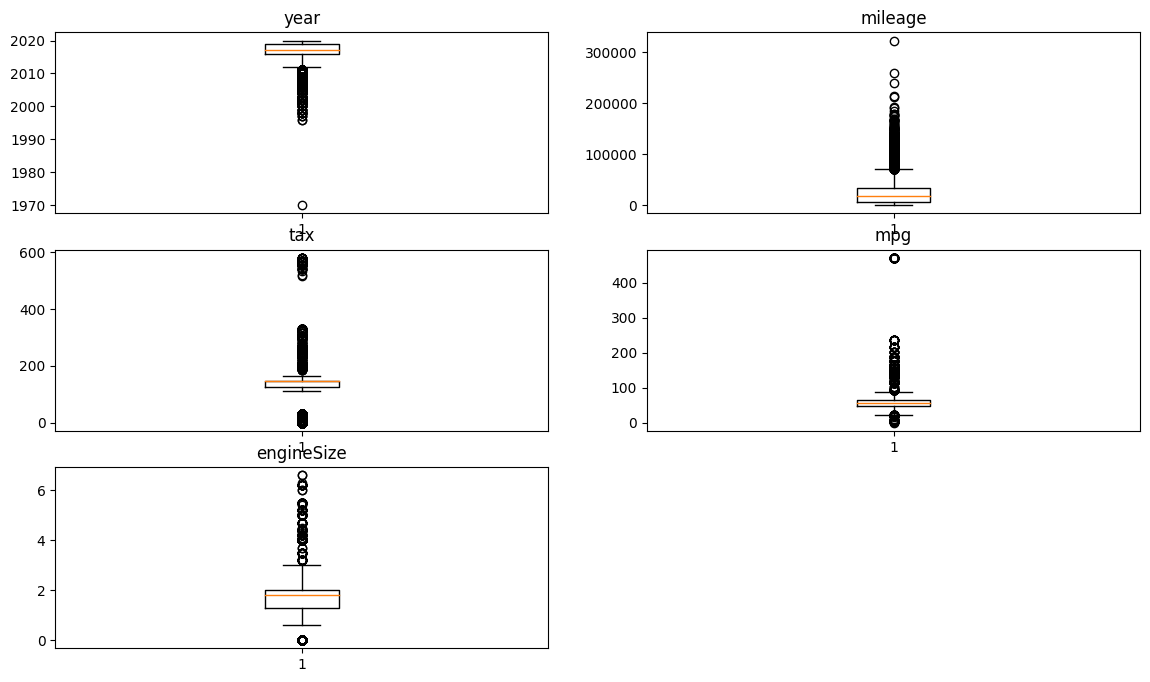

In [208]:
# Definiendo una figura para ver las subfiguras e identificar si cuenta con outliers
fig = plt.figure(figsize=(14, 8))

# Agregando las subfiguras
for i, col in enumerate(numerical_features):
  ax = fig.add_subplot(3, 2, i+1)
  ax.boxplot(data[col])
  ax.set_title(col)

plt.show()

###IQR

In [209]:
var_outliers = ["mileage", "tax", "mpg", "engineSize"]

In [210]:
numerical_data = data[numerical_features]

In [211]:
# Quantile 1 y 3
Q1 = numerical_data.quantile(0.24)
Q3 = numerical_data.quantile(0.76)

# Obteniendo el IQR
IQR = Q3 - Q1

# Inicializar una máscara para todas las filas
mask_total = pd.Series(True, index=data.index)

# Calcular y combinar las máscaras para cada columna
for col in var_outliers:
    mask = ~((numerical_data[col] < (Q1[col] - 1.5 * IQR[col])) | (numerical_data[col] > (Q3[col] + 1.5 * IQR[col])))
    # Alinear las máscaras para asegurarse de que tengan el mismo índice
    mask = mask.reindex(mask_total.index, fill_value=False)
    # Combinar las máscaras
    mask_total &= mask

len(numerical_data), len(numerical_data[mask_total])
# Perdimos 24125 filas
# Perdimos 2781 filas

(74427, 70329)

##Exploratory Analysis

### Univariate Analysis

**Variables numericas**

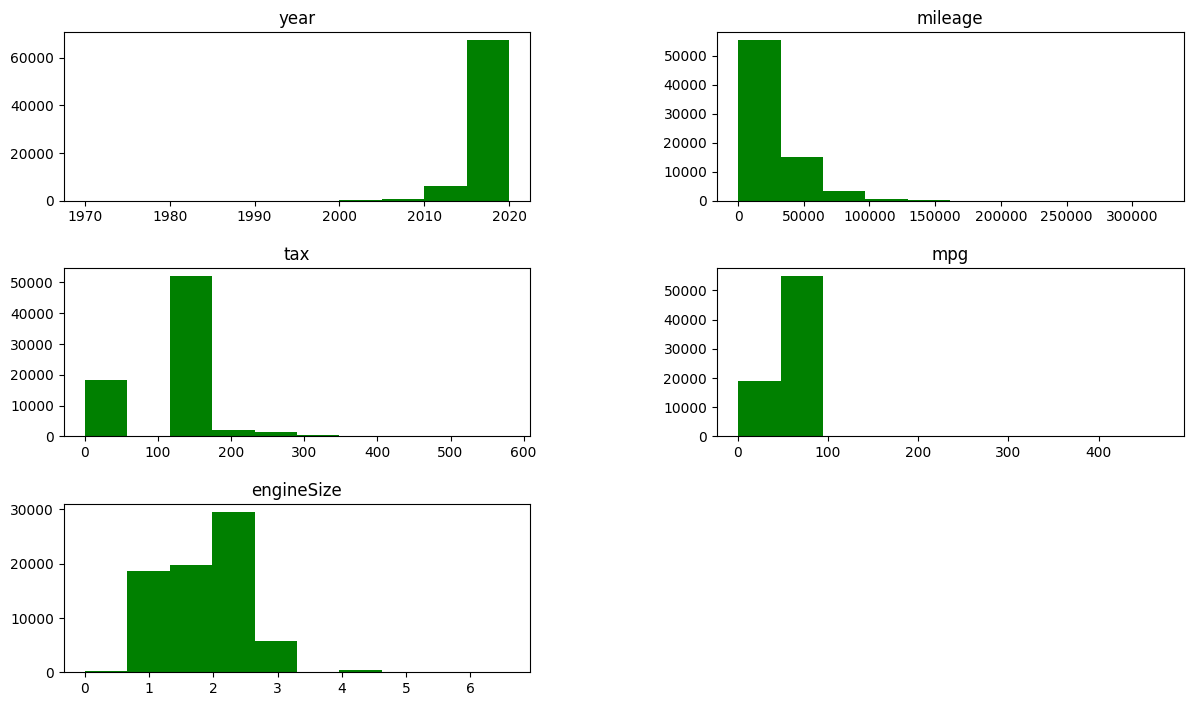

In [212]:
# Definiendo una figura para ver las subfiguras y visualizar los histogramas
fig = plt.figure(figsize=(14, 8))

# Agregando las subfiguras
for i, col in enumerate(numerical_features):
  ax = fig.add_subplot(3, 2, i+1)
  ax.hist(data[col], color="green")
  ax.set_title(col)

# Ajustando los espacios entre las subfiguras
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

**Variables categoricas**

In [213]:
def graficar_var_discretas(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            plt.figure(figsize=(4, 3))
            df[column].value_counts().plot(kind="bar", color="green")
            plt.title(f'Gráfico de barras para {column}')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.xticks(rotation=45)
            plt.show()

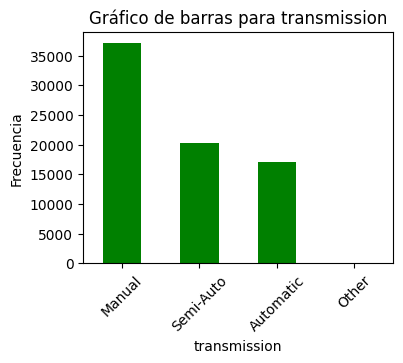

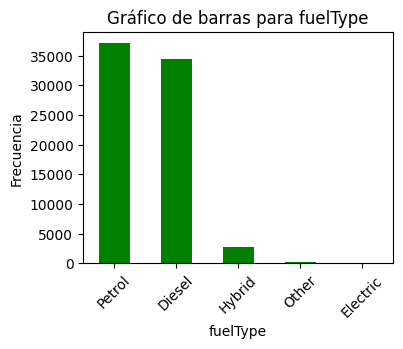

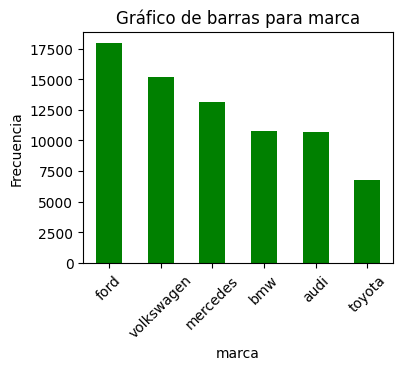

In [214]:
graficar_var_discretas(data[categorical_features])

###Bivariate Analysis

###Heatmap

In [215]:
# Descargar en una variable la matriz de correlación
matriz_Corr = numerical_data.corr().abs()
matriz_Corr

,year,mileage,tax,mpg,engineSize
year,1.000000,0.748577,0.190506,0.134290,0.029934
mileage,0.748577,1.000000,0.212919,0.180944,0.093361
tax,0.190506,0.212919,1.000000,0.439489,0.329210
mpg,0.134290,0.180944,0.439489,1.000000,0.296265
engineSize,0.029934,0.093361,0.329210,0.296265,1.000000


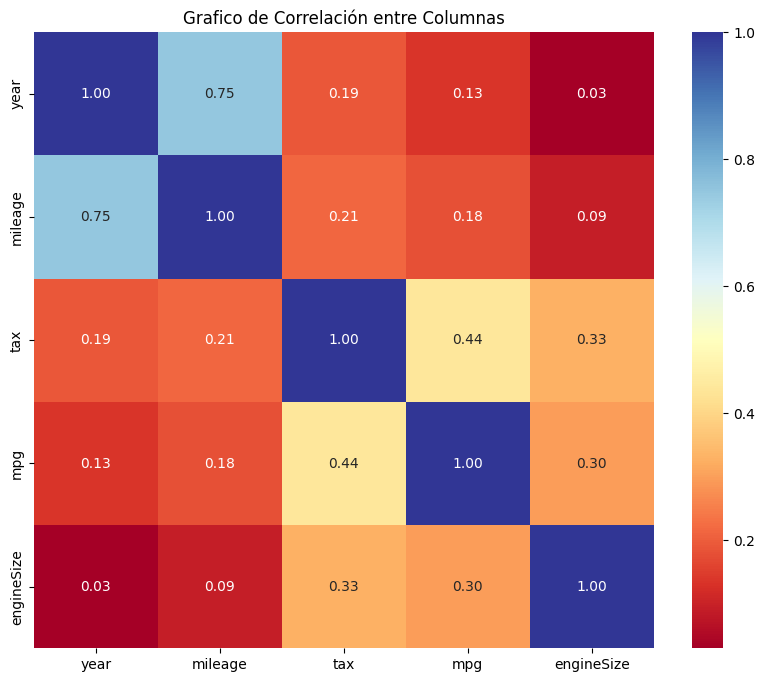

In [216]:
# Grafico de Calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_Corr, annot=True, cmap="RdYlBu", fmt=".2f")
plt.title("Grafico de Correlación entre Columnas")
plt.show()

##Preprocess Data

###One Hot encoding

In [217]:
# Poniendo en otro dataframe las variables categoricas
categorical_data = data[categorical_features]

In [218]:
# Creamos un codificador One-Hot
encoder = OneHotEncoder()

In [219]:
#Aplicando el encoder
encoder.fit(categorical_data)

OneHotEncoder()

In [220]:
# Ajustamos y transformamos los datos categóricos utilizando One-Hot Encoding
encoded_data = encoder.fit_transform(categorical_data)

In [221]:
# Convertir la matriz sparse resultante en un DataFrame de pandas y nombrar las columnas
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_features))

In [222]:
encoded_df.head()

,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,marca_audi,marca_bmw,marca_ford,marca_mercedes,marca_toyota,marca_volkswagen
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


###Scaler

In [223]:
# Poniendo en otro dataframe las variables nummericas
numerical_data = data[numerical_features]

In [224]:
# Definiendo el escalador
scaler = StandardScaler()
scaler.fit(numerical_data)

StandardScaler()

In [225]:
# Escalando datos numericos
numerical_data_preprocessed = scaler.fit_transform(numerical_data)

# Escalando datos categoricos
categorical_data_preprocessed = scaler.fit_transform(encoded_df)

In [226]:
# Concatenando los datos numericos y categoricos escalados
tab = pd.concat([pd.DataFrame(numerical_data_preprocessed), pd.DataFrame(categorical_data_preprocessed)], axis=1)

In [227]:
nuevos_nombres = [f"Columna_{i}" for i in range(len(tab.columns))]

In [228]:
# Asigna los nuevos nombres a las columnas del DataFrame
tab.columns = nuevos_nombres

In [229]:
# Reasigne los nombres de las columnas para que ninguna columna se llamara igual
tab.columns

Index(['Columna_0', 'Columna_1', 'Columna_2', 'Columna_3', 'Columna_4',
       'Columna_5', 'Columna_6', 'Columna_7', 'Columna_8', 'Columna_9',
       'Columna_10', 'Columna_11', 'Columna_12', 'Columna_13', 'Columna_14',
       'Columna_15', 'Columna_16', 'Columna_17', 'Columna_18', 'Columna_19'],
      dtype='object')

## Train, Test, Split

In [230]:
# Definiendo la target
y = data["price"]
y

0        12500
1        16500
2        11000
3        16800
4        17300
         ...  
74422     5990
74423     1799
74424     1590
74425     1250
74426     2295
Name: price, Length: 74427, dtype: int64

In [231]:
# Obteniendo datos de Entrenamiento 70% y prueba 30%
train, test, train_y, test_y =  train_test_split(tab, y,
                                        test_size = 0.30)

##Models

**Funcion para buscar los hiperparametros de los modelos y encontrar los optimos, utiliza programación paralela.**

In [232]:
def entrenar(param, modelo, X, y):
    # Inicia una búsqueda aleatoria de hiperparámetros
    grid = RandomizedSearchCV(param_distributions=param,
                              # Utiliza todos los núcleos disponibles para procesamiento paralelo
                              n_jobs=-1,
                              # Número de iteraciones de búsqueda aleatoria
                              n_iter=10,
                              # Número de divisiones para la validación cruzada
                              cv=4,
                              # Estimador del modelo a utilizar
                              estimator=modelo,
                              # Cómo manejar errores durante el ajuste del modelo
                              error_score='raise')

    # Ajusta el modelo utilizando búsqueda aleatoria de hiperparámetros
    grid.fit(X, y)

    # Retorna los resultados de la búsqueda, el mejor estimador, el mejor puntaje, y los mejores parámetros
    return grid, grid.best_estimator_, grid.best_score_, grid.best_params_

**Funciones para evaluar el modelo**

**Error Cuadrático Medio (MSE):**
* **¿Qué es?**: Promedio de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales.
* **Buen resultado**: Cuanto más cercano a cero, mejor. Indica que el modelo tiene una precisión alta en sus predicciones.

**Error Absoluto Medio (MAE):**
* **¿Qué es?**: Promedio de las diferencias absolutas entre las predicciones del modelo y los valores reales.
* **Buen resultado**: Cuanto más cercano a cero, mejor. Similar al MSE, pero menos sensible a valores atípicos.

**Coeficiente de Determinación (R²):**
* **¿Qué es?**: Una medida de la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.
* **Buen resultado**: Cerca de 1. Indica que el modelo explica una gran parte de la variabilidad de los datos. Un valor negativo indica que el modelo es peor que simplemente predecir la media de los datos observados.

In [233]:
def evaluar_modelo(modelo, Xt, Xv, yt, yv):
    # Hacer predicciones para los datos de prueba
    pred_prueba = modelo.predict(Xv)

    # Calcular métricas de evaluación para los datos de prueba
    mse_prueba = mean_squared_error(yv, pred_prueba)
    r2_prueba = r2_score(yv, pred_prueba)
    mae_prueba = mean_absolute_error(yv, pred_prueba)

    # Devolver las métricas solo para los datos de prueba
    resultado = {
        "mse_prueba": mse_prueba,
        "mae_prueba": mae_prueba,
        "r2_prueba": r2_prueba
    }
    return resultado

###LinearRegression

In [234]:
# Crear y entrenar el modelo de regresión lineal
model_LR = LinearRegression()

In [235]:
param_LR = dict(
    fit_intercept = [True, False],  # Si se debe ajustar una intersección o no
    copy_X = [True, False],  # Si se debe copiar X o modificarlo directamente
    n_jobs = [None, 1, 2],  # Número de trabajos a ejecutar en paralelo
    positive = [False, True],  # Si se debe restringir los coeficientes a ser no negativos
)

In [236]:
modelo_LR, best_estimator, score, params =entrenar(param_LR, model_LR, train, train_y)

In [237]:
evaluar_modelo(modelo_LR, train, test, train_y, test_y)

{'mse_prueba': 26201089.834750008,
 'mae_prueba': 3195.468340882393,
 'r2_prueba': 0.7580660494280763}

In [238]:
best_estimator

LinearRegression()

###Ridge

In [239]:
# Crear y entrenar el modelo de regresión Lasso (con regularización L2)
modelo_R = Ridge()

In [240]:
param_ridge = dict(
    alpha = [0.1, 1.0, 10.0],  # Parámetro de regularización
    solver = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Algoritmo para resolver el problema
    tol = [1e-3, 1e-4, 1e-5],  # Tolerancia para la convergencia
    random_state = [None, 42]  # Semilla aleatoria para la reproducibilidad
)

In [241]:
modelo_R, best_estimator, score, params = entrenar(param_ridge, modelo_R, train, train_y)
evaluar_modelo(modelo_R, train, test, train_y, test_y)

{'mse_prueba': 26201766.297036808,
 'mae_prueba': 3195.837855747898,
 'r2_prueba': 0.7580598031537995}

###Lasso

In [242]:
# Crear y entrenar el modelo de regresión Lasso (con regularización L1)
modelo_L = Lasso()

In [243]:
param_lasso = dict(
    alpha = [0.1, 1.0, 10.0],  # Parámetro de regularización
    max_iter = [1000, 2000, 3000],  # Número máximo de iteraciones
    tol = [1e-3, 1e-4, 1e-5],  # Tolerancia para la convergencia
    random_state = [None, 42]  # Semilla aleatoria para la reproducibilidad
)

In [245]:
modelo_L, best_estimator, score, params = entrenar(param_lasso, modelo_L, train, train_y)
evaluar_modelo(modelo_L, train, test, train_y, test_y)

{'mse_prueba': 26198516.636405017,
 'mae_prueba': 3195.258726006938,
 'r2_prueba': 0.7580898096626748}

##Conclusions

Los tres modelos (regresión lineal, Ridge y Lasso) están proporcionando un rendimiento bastante similar en tus datos de prueba:

El **MSE** (Error Cuadrático Medio) y el MAE (Error Absoluto Medio) son comparables entre los tres modelos, lo que sugiere que todos están haciendo predicciones razonablemente precisas en tus datos de prueba.

El **R²** (Coeficiente de Determinación) también es alto y similar para los tres modelos, lo que indica que todos explican una gran parte de la variabilidad en tus datos de prueba.

Dado que los tres modelos están produciendo resultados comparables en términos de precisión y capacidad explicativa, se podría seleccionar cualquiera de ellos basándote en otros criterios, como la simplicidad del modelo, la interpretabilidad, o la eficiencia computacional. Por ejemplo:

* Si se prefiere un modelo simple y fácil de interpretar, podrías optar por la regresión lineal estándar.
* Si la preocupacion es por el sobreajuste y se quiere penalizar la complejidad del modelo, podrías considerar Ridge o Lasso, que aplican regularización para controlar el tamaño de los coeficientes.

* Si se tienen requisitos específicos de interpretabilidad o eficiencia computacional, podrían evaluarse otros factores para tomar tu decisión.

En resumen, los tres modelos están funcionando bien en tus datos de prueba, por lo que la elección entre ellos puede depender de otros factores que sean importantes para tu situación específica.